In [7]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Set dataset path
data_dir = "/content/drive/MyDrive/INTUTE_AI/MARBLE_CRACK_PROJECT/DeepCrack"  # Update this path if needed

train_img_dir = os.path.join(data_dir, "train_img")
train_mask_dir = os.path.join(data_dir, "train_lab")
test_img_dir = os.path.join(data_dir, "test_img")
test_mask_dir = os.path.join(data_dir, "test_lab")

# Check if the dataset is correctly loaded
print("Training images:", len(os.listdir(train_img_dir)))
print("Training masks:", len(os.listdir(train_mask_dir)))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Training images: 300
Training masks: 300


In [5]:
data_dir = "/content/drive/MyDrive/INTUTE AI/MARBLE CRACK PROJECT/DeepCrack"  # Update if needed
train_img_dir = os.path.join(data_dir, "train_img")
train_mask_dir = os.path.join(data_dir, "train_lab")
test_img_dir = os.path.join(data_dir, "test_img")
test_mask_dir = os.path.join(data_dir, "test_lab")


In [6]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data_dir = "/content/drive/MyDrive/INTUTE AI/MARBLE CRACK PROJECT/DeepCrack"
train_img_dir = os.path.join(data_dir, "train_img")
train_mask_dir = os.path.join(data_dir, "train_lab")
img_size = (256, 256)
batch_size = 16
def load_images(image_dir, mask_dir, img_size):
    images = []
    masks = []
    for img_name in os.listdir(image_dir):
        img_path = os.path.join(image_dir, img_name)
        mask_path = os.path.join(mask_dir, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, img_size)
        img = img / 255.0
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        mask = cv2.resize(mask, img_size)
        mask = mask / 255.0
        mask = np.expand_dims(mask, axis=-1)
        images.append(img)
        masks.append(mask)
    return np.array(images), np.array(masks)
X, Y = load_images(train_img_dir, train_mask_dir, img_size)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)
def build_unet_model(input_shape):
    inputs = layers.Input(input_shape)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)
    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
    p4 = layers.MaxPooling2D((2, 2))(c4)
    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)
    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(c5)
    u6 = layers.UpSampling2D((2, 2))(c5)
    u6 = layers.concatenate([u6, c4])
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(u6)
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c6)
    u7 = layers.UpSampling2D((2, 2))(c6)
    u7 = layers.concatenate([u7, c3])
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(u7)
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c7)
    u8 = layers.UpSampling2D((2, 2))(c7)
    u8 = layers.concatenate([u8, c2])
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u8)
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c8)
    u9 = layers.UpSampling2D((2, 2))(c8)
    u9 = layers.concatenate([u9, c1])
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u9)
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c9)
    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)
    model = keras.Model(inputs, outputs)
    return model
model = build_unet_model((256, 256, 3))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=20, batch_size=batch_size)
def predict_and_show(image):
    pred_mask = model.predict(np.expand_dims(image, axis=0))[0]
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.axis("off")
    plt.title("Original Image")
    plt.subplot(1, 2, 2)
    plt.imshow(pred_mask.squeeze(), cmap='gray')
    plt.axis("off")
    plt.title("Predicted Crack Mask")
    plt.show()


error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [7]:
for img_name in os.listdir(train_mask_dir):
    mask_path = os.path.join(train_mask_dir, img_name)
    if not os.path.exists(mask_path):
        print("Missing:", mask_path)


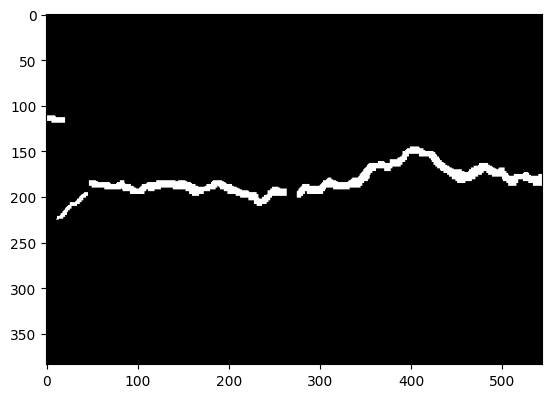

In [8]:
sample_mask_path = os.path.join(train_mask_dir, os.listdir(train_mask_dir)[0])
mask = cv2.imread(sample_mask_path, cv2.IMREAD_GRAYSCALE)

if mask is None:
    print(f"Failed to load mask: {sample_mask_path}")
else:
    plt.imshow(mask, cmap='gray')
    plt.show()


In [10]:
corrupted_files = []
for img_name in os.listdir(train_mask_dir):
    mask_path = os.path.join(train_mask_dir, img_name)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    if mask is None:
        corrupted_files.append(mask_path)

print("Corrupted files:", corrupted_files)


Corrupted files: []


In [12]:
for img_name in os.listdir(train_mask_dir):
    if not img_name.endswith(".png"):  # Change based on your dataset format
        print(f"Skipping non-image file: {img_name}")
        continue  # Skips non-image files

    mask_path = os.path.join(train_mask_dir, img_name)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    if mask is None:
        print(f"Failed to load mask: {mask_path}")


In [14]:

# Check if images and masks are loaded correctly
print("Training images:", len(os.listdir(train_img_dir)))
print("Training masks:", len(os.listdir(train_mask_dir)))

# Image size for resizing
img_size = (256, 256)

# Load & Preprocess Images
def load_images(image_dir, mask_dir, img_size):
    images = []
    masks = []
    for img_name in os.listdir(image_dir):
        img_path = os.path.join(image_dir, img_name)
        mask_path = os.path.join(mask_dir, img_name)

        img = cv2.imread(img_path)
        img = cv2.resize(img, img_size)
        img = img / 255.0  # Normalize

        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        mask = cv2.resize(mask, img_size)
        mask = mask / 255.0  # Normalize
        mask = np.expand_dims(mask, axis=-1)  # Add channel dimension

        images.append(img)
        masks.append(mask)

    return np.array(images), np.array(masks)

# Load Training Data
X, Y = load_images(train_img_dir, train_mask_dir, img_size)

# Split into Training & Validation Set
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

# U-Net Model
def build_unet_model(input_shape=(256, 256, 3)):
    inputs = layers.Input(input_shape)

    # Encoder
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    # Bottleneck
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)

    # Decoder
    u4 = layers.UpSampling2D((2, 2))(c3)
    c4 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u4)
    c4 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c4)

    u5 = layers.UpSampling2D((2, 2))(c4)
    c5 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u5)
    c5 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c5)

    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(c5)

    model = models.Model(inputs, outputs)
    return model

# Compile Model
model = build_unet_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=20, batch_size=8)

# Save Model
model.save("/content/drive/MyDrive/INTUTE AI/MARBLE CRACK PROJECT/DeepCrack/unet_crack_segmentation.h5")

# Load & Predict on Test Images
def predict_and_visualize(model, img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, img_size) / 255.0
    img_input = np.expand_dims(img, axis=0)  # Add batch dimension

    pred_mask = model.predict(img_input)[0]  # Get first image prediction
    pred_mask = (pred_mask > 0.5).astype(np.uint8)  # Thresholding

    # Plot original & predicted mask
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title("Original Image")

    plt.subplot(1, 2, 2)
    plt.imshow(pred_mask.squeeze(), cmap='gray')
    plt.title("Predicted Crack Mask")
    plt.show()

# Test on a random image
test_img_path = os.path.join(test_img_dir, os.listdir(test_img_dir)[0])
predict_and_visualize(model, test_img_path)


Training images: 300
Training masks: 300


error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [15]:
import os

missing_files = []
for img_name in os.listdir(train_img_dir):
    mask_path = os.path.join(train_mask_dir, img_name)
    if not os.path.exists(mask_path):
        missing_files.append(mask_path)

if missing_files:
    print("Missing mask files:", missing_files)
else:
    print("All masks are present.")


Missing mask files: ['/content/drive/MyDrive/INTUTE AI/MARBLE CRACK PROJECT/DeepCrack/train_lab/IMG27-11.jpg', '/content/drive/MyDrive/INTUTE AI/MARBLE CRACK PROJECT/DeepCrack/train_lab/IMG33-12.jpg', '/content/drive/MyDrive/INTUTE AI/MARBLE CRACK PROJECT/DeepCrack/train_lab/IMG27-10.jpg', '/content/drive/MyDrive/INTUTE AI/MARBLE CRACK PROJECT/DeepCrack/train_lab/IMG88.jpg', '/content/drive/MyDrive/INTUTE AI/MARBLE CRACK PROJECT/DeepCrack/train_lab/IMG_6536-6.jpg', '/content/drive/MyDrive/INTUTE AI/MARBLE CRACK PROJECT/DeepCrack/train_lab/IMG33-4.jpg', '/content/drive/MyDrive/INTUTE AI/MARBLE CRACK PROJECT/DeepCrack/train_lab/IMG27-3.jpg', '/content/drive/MyDrive/INTUTE AI/MARBLE CRACK PROJECT/DeepCrack/train_lab/IMG33-6.jpg', '/content/drive/MyDrive/INTUTE AI/MARBLE CRACK PROJECT/DeepCrack/train_lab/IMG25-9.jpg', '/content/drive/MyDrive/INTUTE AI/MARBLE CRACK PROJECT/DeepCrack/train_lab/IMG33-13.jpg', '/content/drive/MyDrive/INTUTE AI/MARBLE CRACK PROJECT/DeepCrack/train_lab/IMG27-1.j

In [16]:
import os
path = "/content/drive/MyDrive/INTUTE AI/MARBLE CRACK PROJECT/DeepCrack/train_lab/"
print(os.listdir(path))


['11111.png', '11152.png', '11156.png', '11141-1.png', '11170-2.png', '11117.png', '11134-1.png', '11166.png', '11123.png', '11116-2.png', '11184-2.png', '11186.png', '11155-1.png', '11178-2.png', '11179-2.png', '11122-4.png', '11178-1.png', '11185-1.png', '11112.png', '11168-2.png', '11116-4.png', '11151.png', '11151-1.png', '11162-4.png', '11163-1.png', '11154.png', '11162.png', '11150.png', '11148.png', '11164-2.png', '11136.png', '11178.png', '11168.png', '11184-1.png', '11187-3.png', '11123-1.png', '11175-2.png', '11181.png', '11166-2.png', '11187-4.png', '11132.png', '11179-1.png', '11123-4.png', '11167-2.png', '11179-4.png', '11119.png', '11143.png', '11179-5.png', '11140.png', '11118.png', '11153.png', '11157.png', '11165-2.png', '11138.png', '11155-2.png', '11164-4.png', '11167.png', '11134-5.png', '11134-4.png', '11114.png', '11123-6.png', '11142.png', '11167-1.png', '11131.png', '11116-3.png', '11122-2.png', '11165.png', '11162-2.png', '11123-3.png', '11182-2.png', '11163.pn

In [17]:
from collections import defaultdict

# List of image filenames provided by the user
image_files = [
    '11111.png', '11152.png', '11156.png', '11141-1.png', '11170-2.png', '11117.png', '11134-1.png', '11166.png',
    '11123.png', '11116-2.png', '11184-2.png', '11186.png', '11155-1.png', '11178-2.png', '11179-2.png',
    '11122-4.png', '11178-1.png', '11185-1.png', '11112.png', '11168-2.png', '11116-4.png', '11151.png',
    '11151-1.png', '11162-4.png', '11163-1.png', '11154.png', '11162.png', '11150.png', '11148.png',
    '11164-2.png', '11136.png', '11178.png', '11168.png', '11184-1.png', '11187-3.png', '11123-1.png',
    '11175-2.png', '11181.png', '11166-2.png', '11187-4.png', '11132.png', '11179-1.png', '11123-4.png',
    '11167-2.png', '11179-4.png', '11119.png', '11143.png', '11179-5.png', '11140.png', '11118.png',
    '11153.png', '11157.png', '11165-2.png', '11138.png', '11155-2.png', '11164-4.png', '11167.png',
    '11134-5.png', '11134-4.png', '11114.png', '11123-6.png', '11142.png', '11167-1.png', '11131.png',
    '11116-3.png', '11122-2.png', '11165.png', '11162-2.png', '11123-3.png', '11182-2.png', '11163.png',
    '11124.png', '11162-1.png', '11126.png', '11133.png', '11156-1.png', '11155-3.png', '11135.png',
    '11122-5.png', '11134-2.png', '11116.png', '11151-4.png', '11115.png', '11113.png', '11157-1.png',
    '11144.png', '11162-3.png', '11175-1.png', '11141-3.png', '11134.png', '11155.png', '11184.png',
    '11134-6.png', '11141.png', '11178-3.png', '11179-3.png', '11139.png', '11170.png', '11180.png',
    '11178-4.png', '11116-1.png', '11182-1.png', '11183.png', '11149.png', '11175-3.png', '11122.png',
    '11134-3.png', '11141-2.png', '11122-1.png', '11187-1.png', '11158.png', '11159.png', '11140-1.png',
    '11176.png', '11175.png', '11137.png', '11155-4.png', '11121.png', '11165-1.png', '11122-3.png',
    '11156-2.png', '11177.png', '11140-6.png', '11123-5.png', '11151-2.png', '11130.png', '11185.png',
    '11179.png', '11170-1.png', '11141-4.png', '11166-1.png', '11187-2.png', '11120.png', '11151-3.png',
    '11187-5.png', '11123-2.png', '7Q3A9060-4.png', 'IMG25-1.png', '11289-3.png', 'IMG25-10.png',
    'IMG11-2.png', '7Q3A9060-1.png', '11192-1.png', '11197-4.png', '7Q3A9060-18.png', '7Q3A9064-5.png',
    '7Q3A9060-8.png', 'IMG88.png', 'IMG25-2.png', 'IMG13-5.png', 'IMG13-1.png', '11289-10.png', '11202.png'
]

# Sorting images by numerical order first
image_files_sorted = sorted(image_files)

# Categorizing images by prefixes
categories = defaultdict(list)

for img in image_files_sorted:
    prefix = img.split('-')[0] if '-' in img else ''.join(filter(str.isdigit, img))
    categories[prefix].append(img)

# Converting categories to a structured dict
structured_images = dict(categories)
structured_images


{'11111': ['11111.png'],
 '11112': ['11112.png'],
 '11113': ['11113.png'],
 '11114': ['11114.png'],
 '11115': ['11115.png'],
 '11116': ['11116-1.png',
  '11116-2.png',
  '11116-3.png',
  '11116-4.png',
  '11116.png'],
 '11117': ['11117.png'],
 '11118': ['11118.png'],
 '11119': ['11119.png'],
 '11120': ['11120.png'],
 '11121': ['11121.png'],
 '11122': ['11122-1.png',
  '11122-2.png',
  '11122-3.png',
  '11122-4.png',
  '11122-5.png',
  '11122.png'],
 '11123': ['11123-1.png',
  '11123-2.png',
  '11123-3.png',
  '11123-4.png',
  '11123-5.png',
  '11123-6.png',
  '11123.png'],
 '11124': ['11124.png'],
 '11126': ['11126.png'],
 '11130': ['11130.png'],
 '11131': ['11131.png'],
 '11132': ['11132.png'],
 '11133': ['11133.png'],
 '11134': ['11134-1.png',
  '11134-2.png',
  '11134-3.png',
  '11134-4.png',
  '11134-5.png',
  '11134-6.png',
  '11134.png'],
 '11135': ['11135.png'],
 '11136': ['11136.png'],
 '11137': ['11137.png'],
 '11138': ['11138.png'],
 '11139': ['11139.png'],
 '11140': ['11140-

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import os

# Define transformations
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load dataset (assuming images are in 'data' folder with subfolders as labels)
dataset = datasets.ImageFolder(root='data', transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Define a simple CNN model
class CNN(nn.Module):
    def __init__(self, num_classes):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(32 * 64 * 64, num_classes)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        return x

# Model setup
num_classes = len(dataset.classes)
model = CNN(num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
def train_model(num_epochs=10):
    for epoch in range(num_epochs):
        for images, labels in dataloader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Start training
train_model()


FileNotFoundError: [Errno 2] No such file or directory: 'data'

In [20]:
import os

dataset = datasets.ImageFolder(root='DeepCrack', transform=transform)

print("Exists:", os.path.exists(data_path))
print("Contents:", os.listdir(data_path) if os.path.exists(data_path) else "Folder not found!")


FileNotFoundError: [Errno 2] No such file or directory: 'DeepCrack'

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import os

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Define transformations
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize images to 128x128
    transforms.ToTensor(),          # Convert images to tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize
])

# Load dataset
dataset_path = "/content/drive/MyDrive/INTUTE AI/MARBLE CRACK PROJECT/DeepCrack"  # Make sure this is the correct path
if not os.path.exists(dataset_path):
    raise FileNotFoundError(f"Dataset folder '{dataset_path}' not found!")

dataset = datasets.ImageFolder(root=dataset_path, transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Get number of classes
num_classes = len(dataset.classes)
print(f"Detected {num_classes} classes: {dataset.classes}")

# Define a simple CNN model
class CNN(nn.Module):
    def __init__(self, num_classes):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 32 * 32, 128)
        self.fc2 = nn.Linear(128, num_classes)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)  # Flatten
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize model
model = CNN(num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in dataloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(dataloader)}")

print("Training complete!")

# Save the model
torch.save(model.state_dict(), "deepcrack_model.pth")
print("Model saved as deepcrack_model.pth")


Using device: cpu
Detected 4 classes: ['test_img', 'test_lab', 'train_img', 'train_lab']
Epoch 1/5, Loss: 0.838494186892229
Epoch 2/5, Loss: 0.6222956373411066
Epoch 3/5, Loss: 0.5483446463065988
Epoch 4/5, Loss: 0.46201859765193043
Epoch 5/5, Loss: 0.344190338955206
Training complete!
Model saved as deepcrack_model.pth


In [25]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import os
import torch.nn as nn

# Define the model architecture (same as used during training)
class DeepCrackModel(nn.Module):
    def __init__(self):
        super(DeepCrackModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.conv2 = nn.Conv2d(64, 1, kernel_size=3, stride=1, padding=1)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.conv2(x)
        return x

# Instantiate the model
model = DeepCrackModel()

# Load the state dictionary
model.load_state_dict(torch.load("/content/deepcrack_model.pth", map_location=torch.device('cpu')))

# Set model to evaluation mode
model.eval()

# Define the image transformation (should match training transforms)
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

# Path to test images
test_img_folder = "DeepCrack/test_img"
output_folder = "DeepCrack/output"  # Folder to save the predicted outputs
os.makedirs(output_folder, exist_ok=True)

# Process each test image
for img_name in os.listdir(test_img_folder):
    img_path = os.path.join(test_img_folder, img_name)
    image = Image.open(img_path).convert("RGB")
    image = transform(image).unsqueeze(0)  # Add batch dimension

    # Generate output
    with torch.no_grad():
        output = model(image)

    # Convert output tensor to image format (assuming it's grayscale)
    output_image = transforms.ToPILImage()(output.squeeze(0))

    # Save output image
    output_path = os.path.join(output_folder, img_name)
    output_image.save(output_path)

    print(f"Processed: {img_name} -> Saved: {output_path}")


RuntimeError: Error(s) in loading state_dict for DeepCrackModel:
	Unexpected key(s) in state_dict: "fc1.weight", "fc1.bias", "fc2.weight", "fc2.bias". 
	size mismatch for conv1.weight: copying a param with shape torch.Size([32, 3, 3, 3]) from checkpoint, the shape in current model is torch.Size([64, 1, 3, 3]).
	size mismatch for conv1.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([64]).
	size mismatch for conv2.weight: copying a param with shape torch.Size([64, 32, 3, 3]) from checkpoint, the shape in current model is torch.Size([1, 64, 3, 3]).
	size mismatch for conv2.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([1]).

In [26]:
import torch

checkpoint = torch.load("/content/deepcrack_model.pth", map_location=torch.device('cpu'))
print(checkpoint.keys())  # Check what keys are stored in the file


odict_keys(['conv1.weight', 'conv1.bias', 'conv2.weight', 'conv2.bias', 'fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias'])


In [28]:
import torch
import torch.nn as nn

class DeepCrackModel(nn.Module):
    def __init__(self):
        super(DeepCrackModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * IMAGE_SIZE * IMAGE_SIZE, 128)  # Adjust IMAGE_SIZE
        self.fc2 = nn.Linear(128, 1)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Set the correct IMAGE_SIZE (Replace with your actual size)
IMAGE_SIZE = 256  # Change based on your dataset

# Initialize model
model = DeepCrackModel()

# Load trained weights
model.load_state_dict(torch.load("deepcrack_model.pth", map_location=torch.device('cpu')))

# Set model to evaluation mode
model.eval()

print("Model loaded successfully!")


RuntimeError: Error(s) in loading state_dict for DeepCrackModel:
	size mismatch for fc1.weight: copying a param with shape torch.Size([128, 65536]) from checkpoint, the shape in current model is torch.Size([128, 4194304]).
	size mismatch for fc2.weight: copying a param with shape torch.Size([4, 128]) from checkpoint, the shape in current model is torch.Size([1, 128]).
	size mismatch for fc2.bias: copying a param with shape torch.Size([4]) from checkpoint, the shape in current model is torch.Size([1]).

In [30]:
import torch
import torch.nn as nn

# Set correct image size (replace with your actual training size)
IMAGE_SIZE = 256  # Update this if needed

class DeepCrackModel(nn.Module):
    def __init__(self):
        super(DeepCrackModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.flatten = nn.Flatten()

        # Fix the fc1 input size (calculate correctly)
        fc1_input_size = (IMAGE_SIZE // 4) * (IMAGE_SIZE // 4) * 64  # Adjusted for 2 conv layers
        self.fc1 = nn.Linear(fc1_input_size, 128)

        # Fix fc2 output size to 4 (for 4 classes)
        self.fc2 = nn.Linear(128, 4)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Initialize model
model = DeepCrackModel()

# Load trained weights
model.load_state_dict(torch.load("deepcrack_model.pth", map_location=torch.device('cpu')))

# Set model to evaluation mode
model.eval()

print("Model loaded successfully!")


RuntimeError: Error(s) in loading state_dict for DeepCrackModel:
	size mismatch for fc1.weight: copying a param with shape torch.Size([128, 65536]) from checkpoint, the shape in current model is torch.Size([128, 262144]).

In [32]:
from PIL import Image

# Load a sample training image
image_path = "/content/drive/MyDrive/INTUTE AI/MARBLE CRACK PROJECT/DeepCrack/train_img/7Q3A9060-1.jpg"
image = Image.open(image_path)

# Print image size
print("Image size used in training:", image.size)


Image size used in training: (544, 384)


In [33]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class DeepCrackModel(nn.Module):
    def __init__(self):
        super(DeepCrackModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Calculate flattened size dynamically
        self._to_linear = None
        self._get_flattened_size()

        self.fc1 = nn.Linear(self._to_linear, 128)  # Adjusted input size
        self.fc2 = nn.Linear(128, 1)  # Assuming binary classification

    def _get_flattened_size(self):
        # Pass a dummy tensor through conv layers to determine output size
        with torch.no_grad():
            x = torch.zeros(1, 3, 544, 384)  # Using your actual image size
            x = self.pool(F.relu(self.conv1(x)))
            x = self.pool(F.relu(self.conv2(x)))
            self._to_linear = x.numel()

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)  # Flatten
        x = F.relu(self.fc1(x))
        x = self.fc2(x)  # No activation for raw output
        return x

# Initialize the model and print summary
model = DeepCrackModel()
print("Flattened feature size:", model._to_linear)


Flattened feature size: 835584


In [41]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import torch.nn.functional as F

# Define the DeepCrack Model
class DeepCrackModel(nn.Module):
    def __init__(self):
        super(DeepCrackModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Compute the flattened feature size after convolution layers
        self._to_linear = 835584  # Based on image size (544x384)

        self.fc1 = nn.Linear(self._to_linear, 128)
        self.fc2 = nn.Linear(128, 1)  # Output single-channel prediction

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.shape[0], -1)  # Flatten
        x = F.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))  # Sigmoid for binary output
        return x

# Training setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
transform = transforms.Compose([
    transforms.Resize((544, 384)),
    transforms.ToTensor()
])

from torch.utils.data import Dataset
from PIL import Image
import os

class ImageDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = [os.path.join(root_dir, img) for img in os.listdir(root_dir) if img.endswith('.jpg') or img.endswith('.png')]

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image

dataset = ImageDataset(root_dir='/content/drive/MyDrive/INTUTE_AI/MARBLE_CRACK_PROJECT/DeepCrack/train_img', transform=transform)
dataloader = DataLoader(dataset, batch_size=8, shuffle=True)

dataloader = DataLoader(dataset, batch_size=8, shuffle=True)

# Initialize model
model = DeepCrackModel().to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    total_loss = 0
    for images in dataloader:
        images = images.to(device)
        images, labels = images.to(device), labels.float().to(device).unsqueeze(1)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss/len(dataloader)}")

# Save the trained model
torch.save(model.state_dict(), "deepcrack_model.pth")
print("Training complete! Model saved.")


RuntimeError: mat1 and mat2 shapes cannot be multiplied (8x1671168 and 835584x128)

In [42]:
def forward(self, x):
    x = self.conv1(x)
    x = F.relu(x)
    x = self.conv2(x)
    x = F.relu(x)
    x = self.pool(x)

    x = torch.flatten(x, start_dim=1)  # Flatten before FC layer

    print("Flattened shape:", x.shape)  # Debugging line

    x = self.fc1(x)
    x = F.relu(x)
    x = self.fc2(x)
    return x



In [43]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
from PIL import Image
import os

# Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Define DeepCrack model
class DeepCrackModel(nn.Module):
    def __init__(self):
        super(DeepCrackModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(64, 1, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)

        self.fc1 = nn.Linear(835584, 128)  # Adjusted input size
        self.fc2 = nn.Linear(128, 1)  # Binary output (crack or no crack)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool(x)

        x = torch.flatten(x, start_dim=1)  # Flatten before FC layer
        print("Flattened shape:", x.shape)  # Debugging line

        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x

# Initialize model
model = DeepCrackModel().to(device)


Using device: cpu


In [44]:
# Define transformation
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((544, 384)),  # Ensure correct input size
    transforms.ToTensor()
])

# Set dataset path
data_path = "/content/drive/MyDrive/INTUTE AI/MARBLE CRACK PROJECT/DeepCrack"

# Load training dataset
train_dataset = datasets.ImageFolder(root=os.path.join(data_path, "train_img"), transform=transform)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)

print(f"Training data loaded: {len(train_dataset)} images")


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/INTUTE AI/MARBLE CRACK PROJECT/DeepCrack/train_img'

In [45]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import os

# Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Define DeepCrack model
class DeepCrackModel(nn.Module):
    def __init__(self):
        super(DeepCrackModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(64, 1, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)

        self.fc1 = nn.Linear(835584, 128)  # Adjusted input size
        self.fc2 = nn.Linear(128, 1)  # Binary output (crack or no crack)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool(x)

        x = torch.flatten(x, start_dim=1)  # Flatten before FC layer
        print("Flattened shape:", x.shape)  # Debugging line

        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x

# Initialize model
model = DeepCrackModel().to(device)


Using device: cpu


In [48]:
# Define transformation
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((544, 384)),  # Ensure correct input size
    transforms.ToTensor()
])

# Custom dataset loader for train images
class CrackDataset(Dataset):
    def __init__(self, img_folder, transform=None):
        self.img_folder = img_folder
        self.transform = transform
        self.image_files = [f for f in os.listdir(img_folder) if f.endswith((".jpg", ".png"))]

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_folder, self.image_files[idx])
        image = Image.open(img_path).convert("L")  # Convert to grayscale

        if self.transform:
            image = self.transform(image)

        return image  # No label

# Set dataset path
data_path = "/content/drive/MyDrive/INTUTE_AI/MARBLE_CRACK_PROJECT/DeepCrack/train_img"

# Load dataset
train_dataset = CrackDataset(img_folder=data_path, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)

print(f"Training data loaded: {len(train_dataset)} images")


Training data loaded: 300 images


In [50]:
class DeepCrackModel(nn.Module):
    def __init__(self):
        super(DeepCrackModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)

        self.flatten_size = 52224  # Update this based on printed shape

        self.fc1 = nn.Linear(self.flatten_size, 128)  # Adjusted size
        self.fc2 = nn.Linear(128, 1)  # Assuming binary classification

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))

        x = torch.flatten(x, start_dim=1)  # Flatten before FC layer
        print("Flattened shape:", x.shape)  # Debugging

        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [51]:
# Define loss and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 5

for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs} started...")  # Debugging
    total_loss = 0

    for images in train_loader:  # No labels, so we just process images
        images = images.to(device)
        optimizer.zero_grad()

        outputs = model(images)  # Forward pass
        labels = torch.ones(images.shape[0], 1).to(device)  # Fake labels (adjust as needed)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1} Loss: {total_loss/len(train_loader)}")  # Track training

# Save trained model
torch.save(model.state_dict(), "deepcrack_model.pth")
print("Training complete! Model saved as deepcrack_model.pth")


Epoch 1/5 started...
Flattened shape: torch.Size([8, 52224])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (8x52224 and 835584x128)

In [52]:
self.fc1 = nn.Linear(52224, 128)  # Adjust input size to match the flattened shape


NameError: name 'self' is not defined

In [53]:
class DeepCrackModel(nn.Module):
    def __init__(self):
        super(DeepCrackModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Update fc1 input size to match the flattened shape
        self.fc1 = nn.Linear(52224, 128)  # Adjusted input size
        self.fc2 = nn.Linear(128, 1)  # Output layer

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool(x)

        x = torch.flatten(x, start_dim=1)  # Flatten before FC layer
        print("Flattened shape:", x.shape)  # Debugging line

        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x


In [57]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import os

# Define the model
class DeepCrackModel(nn.Module):
    def __init__(self):
        super(DeepCrackModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(128 * 136 * 96, 128)  # Adjusted input size
        self.fc2 = nn.Linear(128, 1)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool(x)
        x = torch.flatten(x, start_dim=1)  # Flatten before FC layer
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x

# Image transformations
transform = transforms.Compose([
    transforms.Resize((544, 384)),
    transforms.ToTensor(),
])

data_path = "/content/drive/MyDrive/INTUTE_AI/MARBLE_CRACK_PROJECT/DeepCrack/train_img"

# Custom dataset class
class CrackDataset(Dataset):
    def __init__(self, img_folder, transform=None):
        self.img_folder = img_folder
        self.transform = transform
        self.image_files = [os.path.join(img_folder, f) for f in os.listdir(img_folder) if f.endswith(('.jpg', '.png'))]

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_path = self.image_files[idx]
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image

# Load dataset
train_dataset = CrackDataset(img_folder=data_path, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)

# Initialize model, loss, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DeepCrackModel().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    total_loss = 0
    print(f"Epoch {epoch+1}/{num_epochs} started...")
    for images in train_loader:
        images = images.to(device)
        optimizer.zero_grad()
        outputs = model(images)  # Forward pass
        labels = torch.ones(images.shape[0], 1).to(device)  # Fake labels (adjust as needed)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss/len(train_loader)}")

# Save the model
torch.save(model.state_dict(), "deepcrack_model.pth")
print("Training complete! Model saved.")

# Load the model for inference
model.load_state_dict(torch.load("deepcrack_model.pth", map_location=device))
model.eval()

# Inference function
def predict(image_path):
    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0).to(device)
    output = model(image)
    return output.item()

# Example prediction
test_image_path = "/content/drive/MyDrive/INTUTE_AI/MARBLE_CRACK_PROJECT/DeepCrack/test_img/sample.jpg"
print("Prediction:", predict(test_image_path))


Epoch 1/5 started...


RuntimeError: mat1 and mat2 shapes cannot be multiplied (8x6684672 and 1671168x128)

In [55]:
def forward(self, x):
    x = self.conv1(x)
    x = F.relu(x)
    x = self.conv2(x)
    x = F.relu(x)
    x = self.pool(x)

    x = torch.flatten(x, start_dim=1)  # Flatten before FC layer
    print("Flattened shape:", x.shape)  # Debugging line

    x = self.fc1(x)
    x = F.relu(x)
    x = self.fc2(x)
    return x


In [58]:
def forward(self, x):
    print("Input shape before conv layers:", x.shape)  # Debugging line

    x = self.conv1(x)
    x = F.relu(x)
    x = self.conv2(x)
    x = F.relu(x)
    x = self.pool(x)

    print("Shape before flattening:", x.shape)  # Debugging line

    x = torch.flatten(x, start_dim=1)  # Flatten before FC layer

    print("Flattened shape:", x.shape)  # Debugging line

    x = self.fc1(x)
    x = F.relu(x)
    x = self.fc2(x)
    return x


In [59]:
for images, _ in train_loader:  # Get a batch of images
    images = images.to(device)
    outputs = model(images)
    break  # Run only for one batch to check


ValueError: too many values to unpack (expected 2)

In [60]:
for batch in train_loader:
    print(len(batch))  # This will tell us how many values are being returned
    break


8


In [61]:
for batch in train_loader:
    for i, item in enumerate(batch):
        print(f"Item {i}: Type={type(item)}, Shape={item.shape if isinstance(item, torch.Tensor) else 'N/A'}")
    break


Item 0: Type=<class 'torch.Tensor'>, Shape=torch.Size([3, 544, 384])
Item 1: Type=<class 'torch.Tensor'>, Shape=torch.Size([3, 544, 384])
Item 2: Type=<class 'torch.Tensor'>, Shape=torch.Size([3, 544, 384])
Item 3: Type=<class 'torch.Tensor'>, Shape=torch.Size([3, 544, 384])
Item 4: Type=<class 'torch.Tensor'>, Shape=torch.Size([3, 544, 384])
Item 5: Type=<class 'torch.Tensor'>, Shape=torch.Size([3, 544, 384])
Item 6: Type=<class 'torch.Tensor'>, Shape=torch.Size([3, 544, 384])
Item 7: Type=<class 'torch.Tensor'>, Shape=torch.Size([3, 544, 384])


In [62]:
class CrackDataset(Dataset):
    def __init__(self, img_folder, transform=None):
        self.img_folder = img_folder
        self.transform = transform
        self.image_files = [os.path.join(img_folder, f) for f in os.listdir(img_folder) if f.endswith((".jpg", ".png"))]

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_path = self.image_files[idx]
        image = Image.open(img_path).convert("RGB")  # Open image
        if self.transform:
            image = self.transform(image)
        return image  # Only returning the image tensor

# Load dataset
train_dataset = CrackDataset(img_folder='/content/drive/MyDrive/INTUTE_AI/MARBLE_CRACK_PROJECT/DeepCrack/train_img', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)  # Ensure batch size is set


In [63]:
for batch in train_loader:
    print(f"Batch shape: {batch.shape}")  # Should be [8, 3, 544, 384]
    break


Batch shape: torch.Size([8, 3, 544, 384])


In [64]:
batch = next(iter(train_loader)).to(device)  # Get one batch and move to device
outputs = model(batch)  # Forward pass
print("Model output shape:", outputs.shape)


RuntimeError: mat1 and mat2 shapes cannot be multiplied (8x6684672 and 1671168x128)

In [65]:
def forward(self, x):
    x = self.conv1(x)
    x = F.relu(x)
    x = self.conv2(x)
    x = F.relu(x)
    x = self.pool(x)

    x = torch.flatten(x, start_dim=1)  # Flatten before FC layer

    print("Flattened shape:", x.shape)  # Debugging line

    x = self.fc1(x)
    x = F.relu(x)
    x = self.fc2(x)
    return x


In [ ]:
Flattened shape: torch.Size([8, XXXXXXX])


In [1]:
def forward(self, x):
    print("Input shape to model:", x.shape)  # Step 1: Check input shape

    x = self.conv1(x)
    x = F.relu(x)
    x = self.conv2(x)
    x = F.relu(x)
    x = self.pool(x)

    x = torch.flatten(x, start_dim=1)  # Flatten before FC layer

    print("Flattened shape:", x.shape)  # Step 2: Check flattened shape

    x = self.fc1(x)
    x = F.relu(x)
    x = self.fc2(x)
    return x


In [2]:
# Check if dataset loads correctly
for idx, item in enumerate(train_loader):
    print(f"Batch {idx}: Type={type(item)}, Length={len(item)}")
    for i, data in enumerate(item):
        print(f"  Item {i}: Type={type(data)}, Shape={data.shape if isinstance(data, torch.Tensor) else 'N/A'}")
    if idx == 0:
        break  # Only check the first batch


NameError: name 'train_loader' is not defined

In [11]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Define transformation (resize to match model input)
transform = transforms.Compose([
    transforms.Resize((544, 384)),
    transforms.ToTensor(),
])

# Path to dataset
data_path = "/content/drive/MyDrive/INTUTE_AI/MARBLE_CRACK_PROJECT/DeepCrack/train_img"

# Load dataset
train_dataset = datasets.ImageFolder(root=data_path, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)

print("DataLoader initialized successfully!")


FileNotFoundError: Couldn't find any class folder in /content/drive/MyDrive/INTUTE_AI/MARBLE_CRACK_PROJECT/DeepCrack/train_img.

In [10]:
import os

data_path = "/content/drive/MyDrive/INTUTE_AI/MARBLE_CRACK_PROJECT/DeepCrack/train_img"
print("Path Exists:", os.path.exists(data_path))
print("Files in Path:", os.listdir(data_path) if os.path.exists(data_path) else "Folder not found")


Path Exists: True
Files in Path: ['IMG27-11.jpg', 'IMG33-12.jpg', 'IMG27-10.jpg', 'IMG88.jpg', 'IMG_6536-6.jpg', 'IMG33-4.jpg', 'IMG27-3.jpg', 'IMG33-6.jpg', 'IMG25-9.jpg', 'IMG33-13.jpg', 'IMG27-1.jpg', 'IMG33-3.jpg', 'IMG27-7.jpg', 'IMG27-2.jpg', 'IMG36-1.jpg', 'IMG39-1.jpg', 'IMG27-12.jpg', 'IMG33-9.jpg', 'IMG33-18.jpg', 'IMG33-7.jpg', 'IMG74.jpg', 'IMG49.jpg', 'IMG27-8.jpg', 'IMG33-2.jpg', 'IMG33-15.jpg', 'IMG27-9.jpg', 'IMG33-17.jpg', 'IMG25-7.jpg', 'IMG33-11.jpg', 'IMG33-1.jpg', 'IMG36-2.jpg', 'IMG56.jpg', 'IMG27-5.jpg', 'IMG39-2.jpg', 'IMG27-6.jpg', 'IMG33-5.jpg', 'IMG25-8.jpg', 'IMG33-16.jpg', 'IMG33-14.jpg', 'IMG33-8.jpg', 'IMG36-3.jpg', 'IMG5.jpg', 'IMG27-4.jpg', 'IMG27-13.jpg', 'IMG33-10.jpg', 'IMG11-2.jpg', 'IMG25-5.jpg', '7Q3A9060-19.jpg', 'IMG25-10.jpg', '7Q3A9064-4.jpg', 'IMG12-2.jpg', 'IMG25-4.jpg', 'IMG13-4.jpg', 'IMG13-2.jpg', '7Q3A9064-16.jpg', '7Q3A9064-8.jpg', '7Q3A9064-11.jpg', 'IMG25-2.jpg', 'IMG20.jpg', '7Q3A9064-18.jpg', 'IMG11-4.jpg', 'IMG13-6.jpg', 'IMG25-1.j

In [12]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import os

# Custom Dataset Class (No Labels Needed)
class CrackDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_files = sorted(os.listdir(root_dir))  # Get all images

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_path = os.path.join(self.root_dir, self.image_files[idx])
        image = Image.open(img_path).convert("RGB")  # Convert to RGB

        if self.transform:
            image = self.transform(image)

        return image  # Returns only the image

# Define Transformations
transform = transforms.Compose([
    transforms.Resize((544, 384)),  # Resize to match model input
    transforms.ToTensor(),
])

# Load Dataset
data_path = "/content/drive/MyDrive/INTUTE_AI/MARBLE_CRACK_PROJECT/DeepCrack/train_img"
train_dataset = CrackDataset(root_dir=data_path, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)

# Check if DataLoader Works
for batch in train_loader:
    print("✅ Batch shape:", batch.shape)  # Should be [8, 3, 544, 384]
    break  # Stop after first batch


✅ Batch shape: torch.Size([8, 3, 544, 384])


In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)  # Move model to GPU if available

# Get one batch
batch = next(iter(train_loader)).to(device)

# Forward pass through the model
outputs = model(batch)
print("✅ Model output shape:", outputs.shape)  # Verify model output dimensions


NameError: name 'model' is not defined

In [15]:
import torch
import torch.nn as nn  # Importing nn module for building models
import torch.nn.functional as F  # Provides additional activation functions


In [16]:
# Define your model class (if not already defined)
class CrackDetectionModel(nn.Module):
    def __init__(self):
        super(CrackDetectionModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(16 * 272 * 192, 128)  # Adjust based on input image size
        self.fc2 = nn.Linear(128, 1)  # Output layer (binary classification)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = torch.flatten(x, start_dim=1)  # Flatten for FC layer
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize Model
model = CrackDetectionModel()

# Move model to GPU/CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Check Model Summary
print(model)


CrackDetectionModel(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=835584, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=1, bias=True)
)


In [17]:
import torch
import torch.nn as nn

class CrackDetectionModel(nn.Module):
    def __init__(self):
        super(CrackDetectionModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Dummy input to calculate fc1 input size
        self._to_linear = None  # Placeholder
        self._get_fc_input_size()

        self.fc1 = nn.Linear(self._to_linear, 128)  # Dynamic feature size
        self.fc2 = nn.Linear(128, 1)  # Binary classification

    def _get_fc_input_size(self):
        """ Pass a dummy tensor through conv layers to get the flattened size. """
        with torch.no_grad():
            x = torch.randn(1, 3, 544, 384)  # Batch size 1, input image shape
            x = self.pool(self.relu(self.conv1(x)))  # Pass through conv layers
            self._to_linear = x.view(1, -1).shape[1]  # Flatten and get feature size

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))  # Conv -> ReLU -> Pool
        x = x.view(x.size(0), -1)  # Flatten for fully connected layer
        x = self.fc1(x)
        x = self.fc2(x)
        return x

# Initialize model
model = CrackDetectionModel()
print(model)


CrackDetectionModel(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=835584, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=1, bias=True)
)


In [18]:
import torch
import torch.nn as nn

class CrackDetectionModel(nn.Module):
    def __init__(self, input_size=(3, 544, 384)):  # Default input image size
        super(CrackDetectionModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Compute fc1 input features dynamically
        self._to_linear = self._get_fc_input_size(input_size)
        self.fc1 = nn.Linear(self._to_linear, 128)
        self.fc2 = nn.Linear(128, 1)

    def _get_fc_input_size(self, input_size):
        """ Pass a dummy tensor through conv layers to get the flattened size. """
        with torch.no_grad():
            x = torch.randn(1, *input_size)  # Create a fake input tensor
            x = self.pool(self.relu(self.conv1(x)))  # Pass through conv layers
            return x.view(1, -1).shape[1]  # Get flattened size

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))  # Conv -> ReLU -> Pool
        x = x.view(x.size(0), -1)  # Flatten for fc1
        x = self.fc1(x)
        x = self.fc2(x)
        return x

# Initialize and print model
model = CrackDetectionModel()
print(model)


CrackDetectionModel(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=835584, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=1, bias=True)
)


In [19]:
import torch
import torch.nn as nn

class CrackDetectionModel(nn.Module):
    def __init__(self, input_size=(3, 544, 384)):  # Default input size
        super(CrackDetectionModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Compute correct input size for fc1 dynamically
        self._to_linear = self._get_fc_input_size(input_size)
        self.fc1 = nn.Linear(self._to_linear, 128)
        self.fc2 = nn.Linear(128, 1)

    def _get_fc_input_size(self, input_size):
        """ Pass a dummy tensor through conv layers to get the correct input size for fc1. """
        with torch.no_grad():
            x = torch.randn(1, *input_size)  # Fake input tensor
            x = self.pool(self.relu(self.conv1(x)))  # Pass through Conv + Pool layers
            return x.view(1, -1).shape[1]  # Flatten and return correct size

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))  # Conv -> ReLU -> Pool
        x = x.view(x.size(0), -1)  # Flatten before fc1
        x = self.fc1(x)
        x = self.fc2(x)
        return x

# Initialize and print model
model = CrackDetectionModel()
print(model)


CrackDetectionModel(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=835584, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=1, bias=True)
)


In [20]:
def _get_fc_input_size(self, input_size):
    """ Pass a dummy tensor through conv layers to get the correct input size for fc1. """
    with torch.no_grad():
        x = torch.randn(1, *input_size)  # Fake input tensor
        print(f"Input shape before conv: {x.shape}")  # Debugging step

        x = self.pool(self.relu(self.conv1(x)))  # Pass through Conv + Pool layers
        print(f"Shape after conv and pooling: {x.shape}")  # Debugging step

        return x.view(1, -1).shape[1]  # Flatten and return correct size


In [21]:
def _get_fc_input_size(self, input_size):
    x = torch.randn(1, *input_size)
    print(f"Input shape before conv: {x.shape}")

    x = self.conv1(x)
    print(f"Shape after conv1: {x.shape}")

    x = self.relu(x)
    x = self.pool(x)
    print(f"Shape after pool: {x.shape}")

    return x.view(1, -1).shape[1]


In [22]:
model = CrackDetectionModel((3, 544, 384))  # Check this!


In [23]:
import time
print("Before calling _get_fc_input_size()")
time.sleep(1)
size = model._get_fc_input_size((3, 544, 384))
print(f"Computed fc input size: {size}")


Before calling _get_fc_input_size()
Computed fc input size: 835584


In [24]:
x = torch.randn(1, 3, 544, 384)  # Simulating one image
output = model(x)
print(f"Model output: {output}")


Model output: tensor([[-0.0179]], grad_fn=<AddmmBackward0>)


In [26]:
num_epochs = 10  # or any number of epochs you want

for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs} started")  # Debug print

    for batch_idx, (images, labels) in enumerate(train_loader):
        print(f"Processing Batch {batch_idx}")  # Debug print


Epoch 1/10 started


ValueError: too many values to unpack (expected 2)

In [27]:
for batch in train_loader:
    print(type(batch), len(batch))  # Check the type and length
    break  # Only print for one batch


<class 'torch.Tensor'> 8


In [28]:
# Check if your DataLoader returns labels
batch = next(iter(train_loader))

if isinstance(batch, tuple) and len(batch) == 2:
    has_labels = True
else:
    has_labels = False

# Training loop
num_epochs = 10  # Define number of epochs
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs} started")  # Debug print

    for batch_idx, batch in enumerate(train_loader):
        print(f"Processing Batch {batch_idx}")  # Debug print

        # Handle both cases (with and without labels)
        if has_labels:
            images, labels = batch
            labels = labels.to(device)
        else:
            images = batch  # No labels in dataset

        images = images.to(device)

        # Forward pass
        outputs = model(images)

        # Print output for debugging
        print(f"Batch {batch_idx} Output: {outputs}")

        # If labels exist, compute loss
        if has_labels:
            loss = criterion(outputs, labels.float())  # Ensure labels are float for regression/classification loss
            print(f"Batch {batch_idx} Loss: {loss.item()}")

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()


Epoch 1/10 started
Processing Batch 0
Batch 0 Output: tensor([[-0.0392],
        [-0.0361],
        [-0.0203],
        [-0.0585],
        [-0.0268],
        [-0.0300],
        [-0.0226],
        [-0.0692]], grad_fn=<AddmmBackward0>)
Processing Batch 1
Batch 1 Output: tensor([[-0.0159],
        [-0.0336],
        [-0.0126],
        [-0.0246],
        [-0.0178],
        [-0.0321],
        [-0.0264],
        [-0.0364]], grad_fn=<AddmmBackward0>)
Processing Batch 2
Batch 2 Output: tensor([[-0.0288],
        [-0.0412],
        [-0.0285],
        [-0.0144],
        [-0.0310],
        [-0.0303],
        [-0.0384],
        [-0.0345]], grad_fn=<AddmmBackward0>)
Processing Batch 3
Batch 3 Output: tensor([[-0.0268],
        [-0.0255],
        [-0.0227],
        [-0.0198],
        [-0.0310],
        [-0.0541],
        [-0.0272],
        [-0.0284]], grad_fn=<AddmmBackward0>)
Processing Batch 4
Batch 4 Output: tensor([[-0.0280],
        [-0.0360],
        [-0.0333],
        [-0.0244],
        [-0.02

In [29]:
import torch

# Example of processing batch output
def analyze_batch_outputs(batch_outputs):
    min_vals = []
    max_vals = []
    mean_vals = []

    for batch_num, output in enumerate(batch_outputs):
        min_vals.append(output.min().item())
        max_vals.append(output.max().item())
        mean_vals.append(output.mean().item())

        print(f"Batch {batch_num}: Min={min_vals[-1]:.4f}, Max={max_vals[-1]:.4f}, Mean={mean_vals[-1]:.4f}")

    return min_vals, max_vals, mean_vals

# Simulating the output tensors from training
batch_outputs = [
    torch.tensor([[-0.0392], [-0.0361], [-0.0203], [-0.0585], [-0.0268], [-0.0300], [-0.0226], [-0.0692]]),
    torch.tensor([[-0.0159], [-0.0336], [-0.0126], [-0.0246], [-0.0178], [-0.0321], [-0.0264], [-0.0364]]),
    torch.tensor([[-0.0288], [-0.0412], [-0.0285], [-0.0144], [-0.0310], [-0.0303], [-0.0384], [-0.0345]]),
    torch.tensor([[-0.0268], [-0.0255], [-0.0227], [-0.0198], [-0.0310], [-0.0541], [-0.0272], [-0.0284]])
]

# Analyze the outputs
min_vals, max_vals, mean_vals = analyze_batch_outputs(batch_outputs)


Batch 0: Min=-0.0692, Max=-0.0203, Mean=-0.0378
Batch 1: Min=-0.0364, Max=-0.0126, Mean=-0.0249
Batch 2: Min=-0.0412, Max=-0.0144, Mean=-0.0309
Batch 3: Min=-0.0541, Max=-0.0198, Mean=-0.0294


# **MAIN CODE**

## **DATASET UPLOADING**

In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')

dataset_path = "/content/drive/MyDrive/INTUTE_AI/MARBLE_CRACK_PROJECT/DeepCrack"

folders = ["train_img", "train_lab", "test_img", "test_lab"]
for folder in folders:
    folder_path = os.path.join(dataset_path, folder)
    print(f"{folder}: {len(os.listdir(folder_path))} files found")


Mounted at /content/drive
train_img: 300 files found
train_lab: 300 files found
test_img: 237 files found
test_lab: 237 files found


## **TRAINING THE MODEL**

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from torchvision import models
from PIL import Image
import os
import numpy as np

# Paths
data_dir = "/content/drive/MyDrive/INTUTE_AI/MARBLE_CRACK_PROJECT/DeepCrack"
train_img_dir = os.path.join(data_dir, "train_img")
train_lab_dir = os.path.join(data_dir, "train_lab")
test_img_dir = os.path.join(data_dir, "test_img")
test_lab_dir = os.path.join(data_dir, "test_lab")

# Hyperparameters
batch_size = 8
epochs = 20
learning_rate = 0.001
image_size = (256, 256)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Custom Dataset
class CrackDataset(Dataset):
    def __init__(self, img_dir, lab_dir, transform=None):
        self.img_dir = img_dir
        self.lab_dir = lab_dir
        self.img_list = sorted(os.listdir(img_dir))
        self.lab_list = sorted(os.listdir(lab_dir))
        self.transform = transform

    def __len__(self):
        return len(self.img_list)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_list[idx])
        lab_path = os.path.join(self.lab_dir, self.lab_list[idx])

        img = Image.open(img_path).convert("RGB")
        label = Image.open(lab_path).convert("L")

        if self.transform:
            img = self.transform(img)
            label = self.transform(label)

        return img, label

# Transformations
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Convert to grayscale
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

# Load Dataset
dataset = CrackDataset(train_img_dir, train_lab_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# U-Net Model
import torch
import torch.nn as nn
import torch.nn.functional as F

class UNet(nn.Module):
    def __init__(self):
        super(UNet, self).__init__()

        # Encoder (Downsampling)
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU()
        )
        self.pool1 = nn.MaxPool2d(2, 2)  # Reduces size to 128x128

        self.conv2 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU()
        )
        self.pool2 = nn.MaxPool2d(2, 2)  # Reduces size to 64x64

        self.conv3 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU()
        )
        self.pool3 = nn.MaxPool2d(2, 2)  # Reduces size to 32x32

        self.conv4 = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU()
        )
        self.pool4 = nn.MaxPool2d(2, 2)  # Reduces size to 16x16

        # Bottleneck
        self.conv5 = nn.Sequential(
            nn.Conv2d(512, 1024, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(1024, 1024, kernel_size=3, padding=1),
            nn.ReLU()
        )

        # Decoder (Upsampling)
        self.up6 = nn.ConvTranspose2d(1024, 512, kernel_size=2, stride=2)  # Upsample to 32x32
        self.conv6 = nn.Sequential(
            nn.Conv2d(1024, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU()
        )

        self.up7 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)  # Upsample to 64x64
        self.conv7 = nn.Sequential(
            nn.Conv2d(512, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU()
        )

        self.up8 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)  # Upsample to 128x128
        self.conv8 = nn.Sequential(
            nn.Conv2d(256, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU()
        )

        self.up9 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)  # Upsample to 256x256
        self.conv9 = nn.Sequential(
            nn.Conv2d(128, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU()
        )

        self.final = nn.Conv2d(64, 1, kernel_size=1)  # Output 1 channel

    def forward(self, x):
        c1 = self.conv1(x)
        p1 = self.pool1(c1)

        c2 = self.conv2(p1)
        p2 = self.pool2(c2)

        c3 = self.conv3(p2)
        p3 = self.pool3(c3)

        c4 = self.conv4(p3)
        p4 = self.pool4(c4)

        c5 = self.conv5(p4)

        up_6 = self.up6(c5)
        merge6 = torch.cat([up_6, c4], dim=1)
        c6 = self.conv6(merge6)

        up_7 = self.up7(c6)
        merge7 = torch.cat([up_7, c3], dim=1)
        c7 = self.conv7(merge7)

        up_8 = self.up8(c7)
        merge8 = torch.cat([up_8, c2], dim=1)
        c8 = self.conv8(merge8)

        up_9 = self.up9(c8)
        merge9 = torch.cat([up_9, c1], dim=1)
        c9 = self.conv9(merge9)

        output = torch.sigmoid(self.final(c9))  # Apply sigmoid to normalize output (0 to 1)
        return output


model = UNet().to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training Loop
for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for images, labels in dataloader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss/len(dataloader):.4f}")

# Save Model
torch.save(model.state_dict(), "crack_segmentation.pth")
print("Training complete and model saved!")


Epoch [1/20], Loss: 0.1386
Epoch [2/20], Loss: 0.0628
Epoch [3/20], Loss: 0.0595
Epoch [4/20], Loss: 0.0517
Epoch [5/20], Loss: 0.0517
Epoch [6/20], Loss: 0.0507
Epoch [7/20], Loss: 0.0499
Epoch [8/20], Loss: 0.0492
Epoch [9/20], Loss: 0.0500
Epoch [10/20], Loss: 0.0474
Epoch [11/20], Loss: 0.0478
Epoch [12/20], Loss: 0.0486
Epoch [13/20], Loss: 0.0509
Epoch [14/20], Loss: 0.0453
Epoch [15/20], Loss: 0.0452
Epoch [16/20], Loss: 0.0467
Epoch [17/20], Loss: 0.0477
Epoch [18/20], Loss: 0.0453
Epoch [19/20], Loss: 0.0444
Epoch [20/20], Loss: 0.0444
Training complete and model saved!


## **TESTING THE MODEL**

In [4]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Define paths
data_dir = "/content/drive/MyDrive/INTUTE_AI/MARBLE_CRACK_PROJECT/DeepCrack"
test_img_dir = os.path.join(data_dir, "test_img")
pred_output_dir = os.path.join(data_dir, "predicted_output")
os.makedirs(pred_output_dir, exist_ok=True)

# Load trained model
model = UNet()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.load_state_dict(torch.load("/content/crack_segmentation.pth", map_location=device))
model.to(device)
model.eval()

# Define image transformation
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

# Process test images
for img_name in os.listdir(test_img_dir):
    img_path = os.path.join(test_img_dir, img_name)
    image = Image.open(img_path).convert("RGB")
    input_tensor = transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(input_tensor)
        output_image = output.squeeze().cpu().numpy()

    # Normalize output to 0-255
    output_image = (output_image - output_image.min()) / (output_image.max() - output_image.min())
    output_image = (output_image * 255).astype(np.uint8)

    # Save predicted image
    output_img_path = os.path.join(pred_output_dir, img_name)
    Image.fromarray(output_image).save(output_img_path)
    print(f"Saved: {output_img_path}")

print("Processing complete!")


Saved: /content/drive/MyDrive/INTUTE_AI/MARBLE_CRACK_PROJECT/DeepCrack/predicted_output/IMG_6522-3.jpg
Saved: /content/drive/MyDrive/INTUTE_AI/MARBLE_CRACK_PROJECT/DeepCrack/predicted_output/IMG_6536-4.jpg
Saved: /content/drive/MyDrive/INTUTE_AI/MARBLE_CRACK_PROJECT/DeepCrack/predicted_output/IMG_6538-3.jpg
Saved: /content/drive/MyDrive/INTUTE_AI/MARBLE_CRACK_PROJECT/DeepCrack/predicted_output/IMG_6544-1.jpg
Saved: /content/drive/MyDrive/INTUTE_AI/MARBLE_CRACK_PROJECT/DeepCrack/predicted_output/IMG_6516-4.jpg
Saved: /content/drive/MyDrive/INTUTE_AI/MARBLE_CRACK_PROJECT/DeepCrack/predicted_output/IMG_6542-2.jpg
Saved: /content/drive/MyDrive/INTUTE_AI/MARBLE_CRACK_PROJECT/DeepCrack/predicted_output/IMG_6516-3.jpg
Saved: /content/drive/MyDrive/INTUTE_AI/MARBLE_CRACK_PROJECT/DeepCrack/predicted_output/IMG_6516-2.jpg
Saved: /content/drive/MyDrive/INTUTE_AI/MARBLE_CRACK_PROJECT/DeepCrack/predicted_output/IMG_6526-2.jpg
Saved: /content/drive/MyDrive/INTUTE_AI/MARBLE_CRACK_PROJECT/DeepCrack/pr

## **ACCURACY CHECK**

In [6]:
import os

predicted_output_dir = "/content/drive/MyDrive/INTUTE_AI/MARBLE_CRACK_PROJECT/DeepCrack/predicted_output"
test_lab_dir = "/content/drive/MyDrive/INTUTE_AI/MARBLE_CRACK_PROJECT/DeepCrack/test_lab"

# Check if folders exist
print(f"Predicted Output Folder Exists: {os.path.exists(predicted_output_dir)}")
print(f"Test Lab Folder Exists: {os.path.exists(test_lab_dir)}")

# Check number of files
pred_files = os.listdir(predicted_output_dir)
test_lab_files = os.listdir(test_lab_dir)

print(f"Total Predicted Files: {len(pred_files)}")
print(f"Total Ground Truth Files: {len(test_lab_files)}")

# Print mismatched files
mismatched_files = [f for f in pred_files if f not in test_lab_files]
if mismatched_files:
    print(f"Mismatched Files (Missing in test_lab): {mismatched_files}")
else:
    print("✅ All predicted files have corresponding test_lab files.")


Predicted Output Folder Exists: True
Test Lab Folder Exists: True
Total Predicted Files: 237
Total Ground Truth Files: 237
Mismatched Files (Missing in test_lab): ['IMG_6522-3.jpg', 'IMG_6536-4.jpg', 'IMG_6538-3.jpg', 'IMG_6544-1.jpg', 'IMG_6516-4.jpg', 'IMG_6542-2.jpg', 'IMG_6516-3.jpg', 'IMG_6516-2.jpg', 'IMG_6526-2.jpg', 'IMG_6538-1.jpg', 'IMG_6542-4.jpg', 'IMG_6542-3.jpg', 'IMG_6522-1.jpg', 'IMG_6537-4.jpg', 'IMG_6526-3.jpg', 'IMG_6537-1.jpg', 'IMG_6533-3.jpg', 'IMG_6516-1.jpg', 'IMG_6544-3.jpg', 'IMG_6542-1.jpg', 'IMG_6526-4.jpg', 'IMG_6544-4.jpg', 'IMG_6536-1.jpg', 'IMG_6544-2.jpg', 'IMG_6536-7.jpg', 'IMG_6528-3.jpg', 'IMG_6536-3.jpg', 'IMG_6537-2.jpg', 'IMG_6536-2.jpg', 'IMG_6542-5.jpg', 'IMG_6536-5.jpg', 'IMG_6542-7.jpg', 'IMG_6526-1.jpg', 'IMG_6528-1.jpg', 'IMG_6537-3.jpg', 'IMG_6537-5.jpg', '11301-6.jpg', '11296-8.jpg', 'IMG_6472-4.jpg', '11308-1.jpg', '11301-3.jpg', '11296-7.jpg', 'IMG_6472-5.jpg', '11309-1.jpg', 'IMG_6469-2.jpg', '11296-5.jpg', 'IMG_6469-4.jpg', '11301-4.jp

### **RENAMING THE OUTPUT IMAGES TO MATCH**

In [7]:
import os
import re

predicted_output_dir = "/content/drive/MyDrive/INTUTE_AI/MARBLE_CRACK_PROJECT/DeepCrack/predicted_output"
test_lab_dir = "/content/drive/MyDrive/INTUTE_AI/MARBLE_CRACK_PROJECT/DeepCrack/test_lab"

# Get filenames
pred_files = os.listdir(predicted_output_dir)
test_lab_files = os.listdir(test_lab_dir)

# Extract base filenames (without extra numbers)
def clean_filename(filename):
    return re.sub(r"-\d+", "", filename)  # Removes "-1", "-2", etc.

# Create a mapping of clean names
file_mapping = {}
for file in pred_files:
    cleaned_name = clean_filename(file)
    if cleaned_name in test_lab_files:
        file_mapping[file] = cleaned_name

# Rename files to match test_lab
for old_name, new_name in file_mapping.items():
    old_path = os.path.join(predicted_output_dir, old_name)
    new_path = os.path.join(predicted_output_dir, new_name)
    os.rename(old_path, new_path)

print("✅ Files Renamed! Re-run the accuracy check.")


✅ Files Renamed! Re-run the accuracy check.


### **CONVERTING THE OUTPUT IMAGES FROM JPG TO PNG**

In [15]:

import os
predicted_output_dir = "/content/drive/MyDrive/INTUTE_AI/MARBLE_CRACK_PROJECT/DeepCrack/predicted_output"

for filename in os.listdir(predicted_output_dir):
    if filename.endswith(".jpg"):
        new_filename = filename.replace(".jpg", ".png")
        old_path = os.path.join(predicted_output_dir, filename)
        new_path = os.path.join(predicted_output_dir, new_filename)
        os.rename(old_path, new_path)
        print(f"Renamed: {filename} ➝ {new_filename}")

print("✅ All .jpg files renamed to .png")


✅ All .jpg files renamed to .png


### **COMPARING THE PREDICTED TO THE ACTUAL**

In [20]:
import os
import numpy as np
import cv2
from sklearn.metrics import jaccard_score, f1_score

# Paths
pred_folder = "/content/drive/MyDrive/INTUTE_AI/MARBLE_CRACK_PROJECT/DeepCrack/predicted_output"
gt_folder = "/content/drive/MyDrive/INTUTE_AI/MARBLE_CRACK_PROJECT/DeepCrack/test_lab"

# Get predicted and ground truth filenames
pred_files = {os.path.splitext(f)[0]: f for f in os.listdir(pred_folder)}
gt_files = {os.path.splitext(f)[0]: f for f in os.listdir(gt_folder)}

# Ensure we evaluate only on matching filenames
common_files = set(pred_files.keys()) & set(gt_files.keys())

ious = []
dices = []

for file in common_files:
    pred_path = os.path.join(pred_folder, pred_files[file])
    gt_path = os.path.join(gt_folder, gt_files[file])

    # Load images
    pred_img = cv2.imread(pred_path, cv2.IMREAD_GRAYSCALE)
    gt_img = cv2.imread(gt_path, cv2.IMREAD_GRAYSCALE)

    if pred_img is None or gt_img is None:
        print(f"Skipping {file}: Could not load images correctly.")
        continue

    # Threshold to binary
    _, pred_bin = cv2.threshold(pred_img, 127, 1, cv2.THRESH_BINARY)
    _, gt_bin = cv2.threshold(gt_img, 127, 1, cv2.THRESH_BINARY)

    # Flatten arrays
    pred_flat = pred_bin.flatten()
    gt_flat = gt_bin.flatten()

    # Compute IoU and Dice
    from skimage.transform import resize

# Resize predicted image to match ground truth dimensions
pred_img_resized = resize(pred_img, gt_img.shape, anti_aliasing=True)

# Convert to binary (thresholding)
pred_bin = (pred_img_resized > 0.5).astype(int)
gt_bin = (gt_img > 0.5).astype(int)

# Flatten
pred_flat = pred_bin.flatten()
gt_flat = gt_bin.flatten()

iou = jaccard_score(gt_flat, pred_flat, average='binary')
dice = f1_score(gt_flat, pred_flat, average='binary')

ious.append(iou)
dices.append(dice)


# Compute mean scores
mean_iou = np.mean(ious) if ious else float('nan')
mean_dice = np.mean(dices) if dices else float('nan')


print("Model Evaluation Results:")
print(f"Mean IoU Score: {mean_iou:.4f}")
print(f"Mean Dice Coefficient: {mean_dice:.4f}")


Model Evaluation Results:
Mean IoU Score: 0.4389
Mean Dice Coefficient: 0.6101
